Let's consider two estimators of $\mu$: the median and the mean.

Our model is the following: $$Y_n = \mu + \varepsilon_n.$$
We want to compare both estimators:
- When the errors $\varepsilon_n$ follow a Gaussian distribution
- When the errors $\varepsilon_n$ follow a Laplace distribution

We choose $\lambda$ for the Laplace distribution such as the variance is the same as in the Gaussian distribution. 

We define the standard deviation $\sigma$ = sig = 1. 

1. We first import the necessary libraries.

In [2]:
from scipy.stats import laplace, norm, probplot
import matplotlib.pyplot as plt
import numpy as np

2. Then we define the variables

Let's consider the asymptotical variance of the mean and median. 
We want to observe which one will be the highest, considering
- That the errors are Gaussian
- That the errors are Laplace

Recall: Laplace density function: 
$$f(x) = \frac{\lambda}{2} \cdot \exp(-\lambda |x|)$$

In [3]:
nb_sim = 5000                                   # Number of Monte Carlo simulations.
nb_ech = np.array([10, 20, 50, 100, 200, 500])  # Different size of datasets.

In [4]:
#Define the variables
sig = 1                   # Statement above fixed sig as 1. 
var = sig**2              # Variance is given by the standard deviation squared. 
lam = (2/var)**0.5        # Define lambda for the Laplace according to the Gaussian variance. See explanations below. 

Recall, for Laplace variables $x$, $\mathbb{E}(x) = 0$. We then have:

$$\text{Var(}x\text{)} = \mathbb{E}(x^2) - (\mathbb{E}(x))^2 = \mathbb{E}(x^2) = \int_{-\infty}^{\infty} x^2 \cdot \frac{\lambda}{2} \cdot \exp(- \lambda \cdot |x|) = \int_{-\infty}^{0} x^2 \cdot \frac{\lambda}{2} \cdot \exp(\lambda \cdot x) + \int_{0}^{\infty} x^2 \cdot \frac{\lambda}{2} \cdot \exp(- \lambda \cdot x)$$

By integrating by parts, we get $$\text{Var(}x\text{)} = \frac{2}{\lambda^2} \Leftrightarrow \lambda = \left[\frac{2}{\text{Var(}x \text{)}}\right] ^{\frac{1}{2}}.$$


3. Then we define both distributions thanks to the "norm" and "laplace" functions from the scipy.stats library.

Recall that as Laplace has a variance generally given by Var($x$) $= 2\cdot \sigma^2$, we then have for the standard deviation $\sigma$: 
$$ 2\cdot \sigma^2 = \text{Var(}x) = \frac{2}{\lambda^2} \Leftrightarrow \sigma = \frac{1}{\lambda}.$$

In [5]:
# Gaussian distribution:
distr_gauss = norm(loc=0, scale=sig)  

# Laplace distribution. 
distr_laplace = laplace(loc=0, scale=1/lam)

4. We first compute the variance of the estimator of the median and respectively the mean when the data are Gaussian. We then plot a histogram of both estimators and a qqplot.

Monte Carlo simulation for 10 data when the error follows a Normal distribution.
Median variance : 1.404e-01 

Monte Carlo simulation for 20 data when the error follows a Normal distribution.
Median variance : 7.136e-02 

Monte Carlo simulation for 50 data when the error follows a Normal distribution.
Median variance : 3.063e-02 

Monte Carlo simulation for 100 data when the error follows a Normal distribution.
Median variance : 1.585e-02 

Monte Carlo simulation for 200 data when the error follows a Normal distribution.
Median variance : 7.732e-03 

Monte Carlo simulation for 500 data when the error follows a Normal distribution.
Median variance : 3.055e-03 

Monte Carlo simulation for 10 data when the error follows a Normal distribution.
Mean variance : 9.827e-02 

Monte Carlo simulation for 20 data when the error follows a Normal distribution.
Mean variance : 4.977e-02 

Monte Carlo simulation for 50 data when the error follows a Normal distribution.
Mean variance : 1.962e-02 

Mont

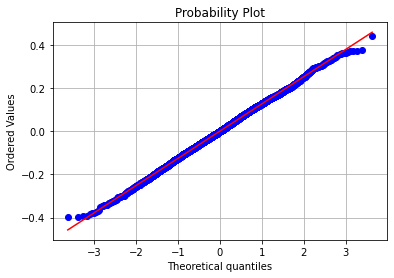

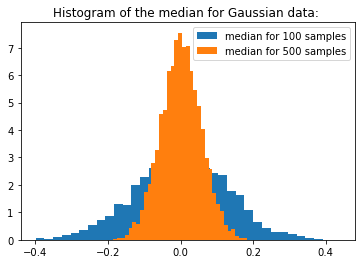

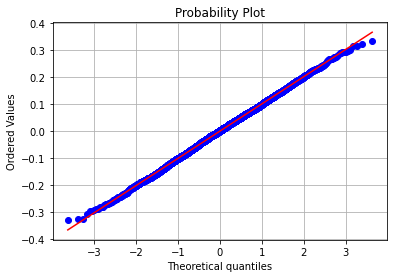

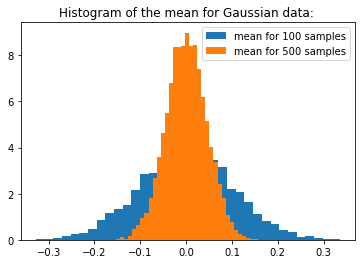

In [6]:
# We create a loop that computes the estimator for the median, and for the mean. 
for param in ['median', 'mean']:  
    variance = []  

# We compute a Monte Carlo simulation for different size of the dataset = nb_ech = [10,20,50,100,200,500]. 
    for ech in nb_ech:                       
        print(f'Monte Carlo simulation for {ech} data when the error follows a Normal distribution.' )  

        
        estimateur = []

        # Monte Carlo
        for i in range(nb_sim):
            ech_gauss = distr_gauss.rvs(ech) 
            estimateur.append(eval(f'np.{param}(ech_gauss)'))  

            # Here we compute np.mean/np.median of each dataset with data following a normal distr.

        # From these 5000 means/ 5000 medians, we compute the variance.      
        variance.append(np.var(estimateur)) 
        if param == 'median':
            print('Median variance : {0:1.3e} \n'.format(variance[-1])) 
        elif param == 'mean':
            print('Mean variance : {0:1.3e} \n'.format(variance[-1]))
            
# ----------------------------------------------

            # We plot the histogram (median and mean) for dataset size 100 and 500
        if ech in [100, 500]:
            plt.figure(f'histogram-{param}') 
            plt.hist(estimateur, density=True, bins=35,
                     label=f'{param} for {ech} samples') 
            plt.legend() 
            if param == 'median':
                plt.title(r'Histogram of the median for Gaussian data: ') 
            elif param == 'mean':
                plt.title(r'Histogram of the mean for Gaussian data: ')

            # QQplot for data set of size 100
            # Red line = Ideal. 
        if ech == 100:
            plt.figure(f'qqplot-{param}')
            probplot(estimateur, dist='norm', plot=plt)  
            plt.grid(True)

5. We do the same thing for a model with an error following a Laplace distribution.

Monte Carlo simulation for 10 Laplace data
Variance of the median : 7.209e-02 

Monte Carlo simulation for 20 Laplace data
Variance of the median : 3.225e-02 

Monte Carlo simulation for 50 Laplace data
Variance of the median : 1.224e-02 

Monte Carlo simulation for 100 Laplace data
Variance of the median : 5.866e-03 

Monte Carlo simulation for 200 Laplace data
Variance of the median : 2.696e-03 

Monte Carlo simulation for 500 Laplace data
Variance of the median : 1.057e-03 

Monte Carlo simulation for 10 Laplace data
Variance of the mean : 1.010e-01 

Monte Carlo simulation for 20 Laplace data
Variance of the mean : 4.903e-02 

Monte Carlo simulation for 50 Laplace data
Variance of the mean : 1.957e-02 

Monte Carlo simulation for 100 Laplace data
Variance of the mean : 1.001e-02 

Monte Carlo simulation for 200 Laplace data
Variance of the mean : 4.985e-03 

Monte Carlo simulation for 500 Laplace data
Variance of the mean : 2.056e-03 



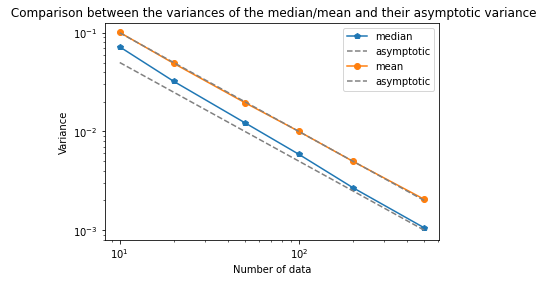

In [13]:
for param in ['median', 'mean']: 
    variance = [] 
    
    for ech in nb_ech:  # nb_ech = [10,20,50,100,200,500]
        print(f'Monte Carlo simulation for {ech} Laplace data' )
            
        estimateur = []  
        
        # Monte Carlo
        for i in range(nb_sim):  
            ech_laplace = distr_laplace.rvs(ech)  
            estimateur.append(eval(f'np.{param}(ech_laplace)'))  
    
        # Here we compute np.mean/np.median of each dataset with data following a normal distr.

        # From these 5000 means/ 5000 medians, we compute the variance.  
        variance.append(np.var(estimateur))  
        if param == 'median':
            print('Variance of the median : {0:1.3e} \n'.format(variance[-1]))  
        elif param == 'mean':
            print('Variance of the mean : {0:1.3e} \n'.format(variance[-1])) 

            
#--------------------------------------------------------------------------------------

# We compute the asymptotic variances (of the median and mean) to compare with the variances of the median and the mean

    # Asymptotic variance of the mean
    if param == 'mean': 
            sym = 'o'
            asymptotic = var/nb_ech
    # Asymptotic variance of the median
    elif param == 'median': 
            sym = 'p'
            asymptotic = 1/(4*nb_ech*distr_laplace.pdf(0)**2)

    # We plot the computed variances and the asymptotic variances.        
    plt.loglog(nb_ech, variance, sym+'-', label=param) 
    plt.loglog(nb_ech, asymptotic, '--', color='gray', label='asymptotic' ) 

    plt.legend() 
    plt.title(r' Comparison between the variances of the median/mean and their asymptotic variance') 
    plt.xlabel('Number of data')
    plt.ylabel('Variance') 